# HW2 Code Part (Investigation)

Group Member:
- Yunlin Tang a14664383
- Yong Liu a15126460
- Jian Jiao a14525939

# Set Up

In [1]:
# import library
library(plyr)
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# read the data
survey <- read.table('videodata.txt', header=TRUE)
followup <- read.table('videoMultiple.txt',header=TRUE)

In [3]:
# check how many rows in both dataset
nrow(survey)
nrow(followup)

[1] 91

[1] 91

In [4]:
length(followup)

[1] 21

# Scenario 1

Begin by providing an estimate for the fraction of students who played a video game in the week prior to the survey. Provide an interval estimate as well as a point estimate for this proportion.

In [5]:
# generate a vector of 0 and 1 to store info for whom played video game
x <- ifelse(survey$time>0, 1, 0)

# calculate for the sample proportion(sample mean)
x_bar <- mean(x)

# show the result
# it estimates the population proportion
x_bar

[1] 0.3736264

In [6]:
# since population variance is unkown, use S^2 instead where S^2 is an unbiased estimator of variance
# use the built-in function "var()" to calculate sample variance
s2 <- var(x)

# calculate s(sample standard deviation) from s^2
s <- sqrt(s2)

# show the result
paste('s^2:', s2)
paste('s:',s)

[1] "s^2: 0.236630036630037"

[1] "s: 0.486446334789395"

In [7]:
# calculate the approximate 68% confidence interval for the population proportion
left_68 = x_bar-s/sqrt(nrow(survey))
right_68 = x_bar+s/sqrt(nrow(survey))

# calculate the approximate 95% confidence interval for the population proportion
left_95 = x_bar-2*s/sqrt(nrow(survey))
right_95 = x_bar+2*s/sqrt(nrow(survey))

# show the result
paste('68% approximate confidence interval: (', left_68, ', ', right_68,')')
paste('95% approximate confidence interval: (', left_95, ', ', right_95,')')

[1] "68% approximate confidence interval: ( 0.322632941962506 ,  0.424619805290241 )"

[1] "95% approximate confidence interval: ( 0.271639510298638 ,  0.475613236954109 )"

In [8]:
# TODO: BOOTSTRAP to check accuracy of estimators?

# Scenario 2

Check to see how the amount of time spent playing vide games in the week prior to the survey compares to the reported frequency of play (daily, weekly, etc). How might the fact that there was an exam in the week prior to the survey affect your previous estimates and this comparison?

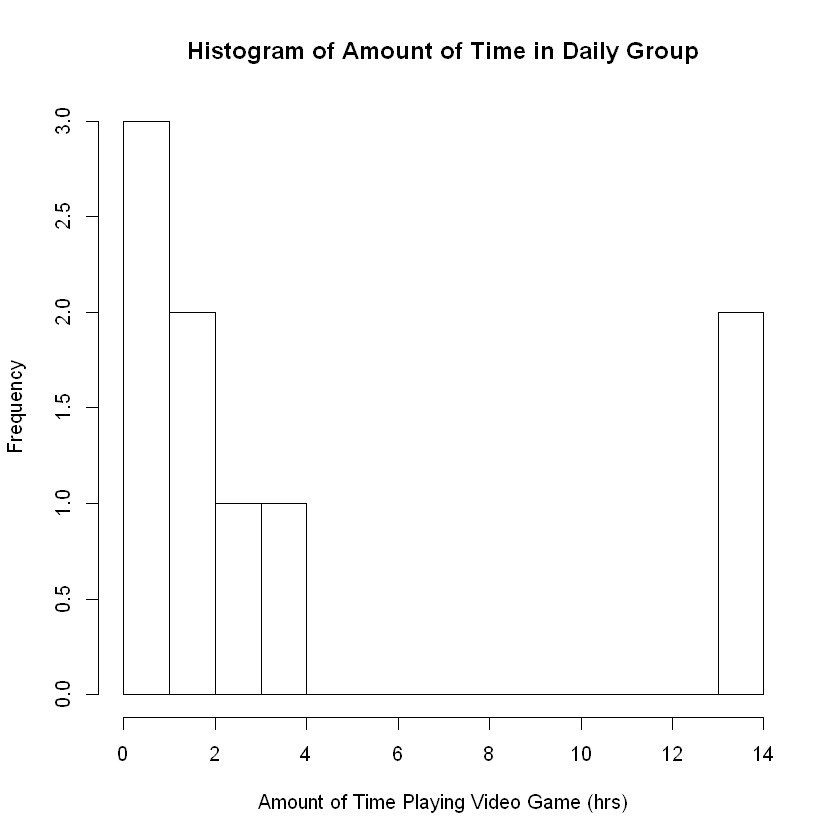

In [9]:
# first check the distribution of amount of time in the Daily Group (group that contains people who responded "1" in "Freq")
hist(subset(survey, freq == 1)$time, breaks=10, main='Histogram of Amount of Time in Daily Group',
    xlab='Amount of Time Playing Video Game (hrs)')

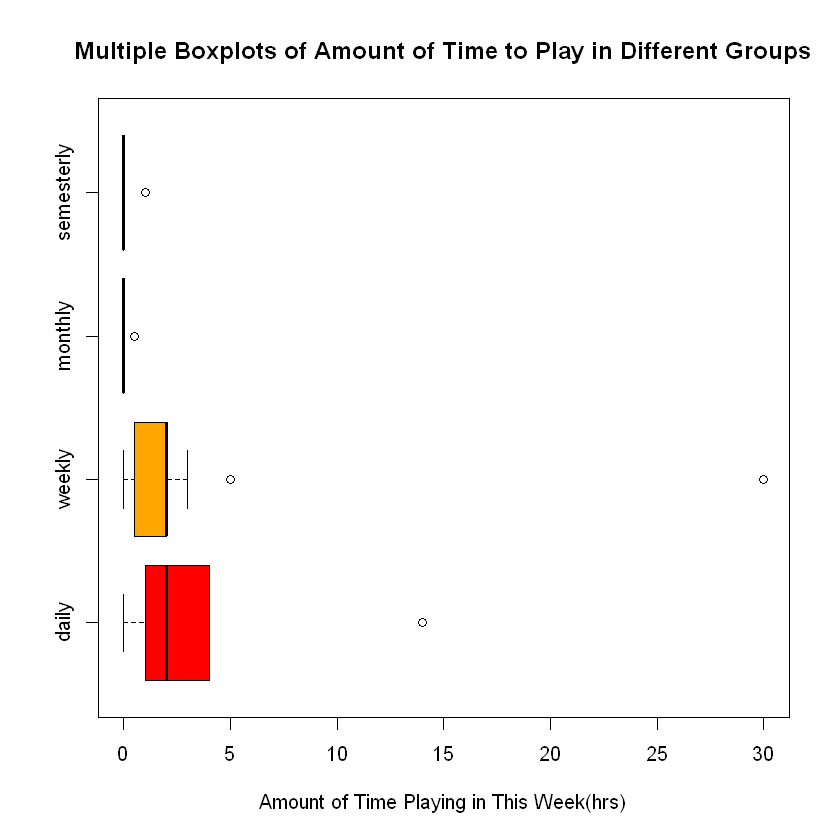

In [10]:
boxplot(subset(survey,freq==1)$time, subset(survey,freq==2)$time, subset(survey, freq==3)$time,
       subset(survey,freq==4)$time, horizontal=TRUE, col=c('red','orange','green','blue'),
       names=c('daily','weekly','monthly','semesterly'),
       main='Multiple Boxplots of Amount of Time to Play in Different Groups',xlab='Amount of Time Playing in This Week(hrs)')

The histogram indicates that most people only played 0-0.5 hours in this week. However it is odd since these people usually play video game daily which indicates that they should have greater amount of time to play in a week than 0.5 hours. Furthermore, the boxplot shows that the medians of amount of time playing in two groups (daily and weekly) are close. This is also odd since we expect that people playing daily should have greater amount in comparing to those weekly people. Thus we investigate further as shown below:

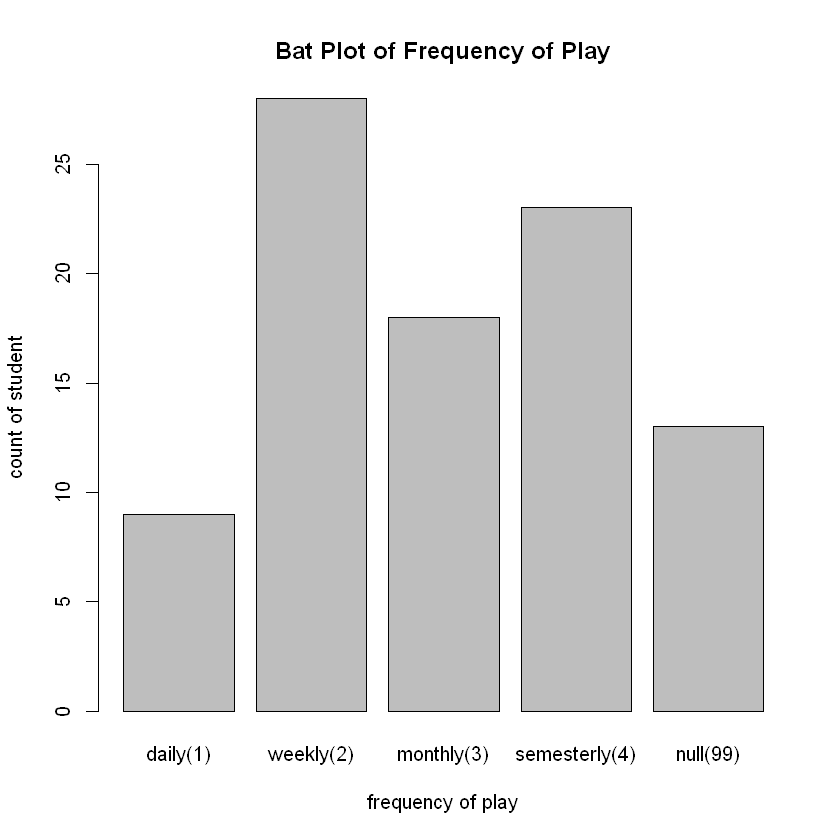

In [11]:
# extract the frequency vector from data
freq <- survey$freq

# plot the value
barplot(table(freq), main='Bat Plot of Frequency of Play',
       xlab='frequency of play', ylab='count of student',
       names.arg=c('daily(1)','weekly(2)','monthly(3)','semesterly(4)','null(99)'))

Since 1 and 2 represent the student usually play video game daily and weekly, it means that they will play video game in the week prior to survey if no other factors are affecting their usual habits. 3 represents the student usually play video game monthly which means that they have 1/4 probability will play in this week. 4 represents the student usually play video game semesterly, it indicates that they have 1/15 chance to play since one semester has 15 weeks. For those who answered 99 in this question, we just assume they will not play at all in this week. Based on this simple assumption, we reconstruct the proportions by extracting the new feature 'play a video game or not in usuall week' from the 'freq' feature (1 means the responder have played the video this week, 0 means he/she did not play video this week).

In [12]:
# create a vector which stores the proportions (fraction of students who played a video game in the week)
resample = NULL

for (i in 1:2000)
{
    # vector for people who usually play video game in a week (fills with 1)
    daily_weekly <- replicate(sum(freq == 1)+sum(freq == 2),1)
    
    # vector for people who usually play video game monthly (has prob. of 1/4 of selecting 1)
    monthly <- sample(c(0,1), size=sum(freq == 3), prob=c(0.75, 0.25),replace=TRUE)
    
    # vector for people who usually play semesterly (has prob. of 1/15 of selecting 1)
    semesterly <- sample(c(0,1), size=sum(freq == 4), prob=c(14/15, 1/15),replace=TRUE)
    
    # vector for people who does not answer the 'freq' question, assume they will not play in this week (fills with 0)
    null <- replicate(sum(freq == 99), 0)
    
    # combine these vectors, and calculate the fraction of student who haved played in this week
    resample[i] <- mean(c(daily_weekly, monthly, semesterly, null))
}

The sample proportion(sample mean) from the original sample is 0.37, which indicates there was only 37% people who have played a video game in this week in the sample of size 91. The histogram below shows the distribution of mean fractions of people who played video game in a week based on their respond in 'freq'. It indicates that it is rare to have 0.37 as fraction, which also means that there is other factor affecting the amount of time to play video game.

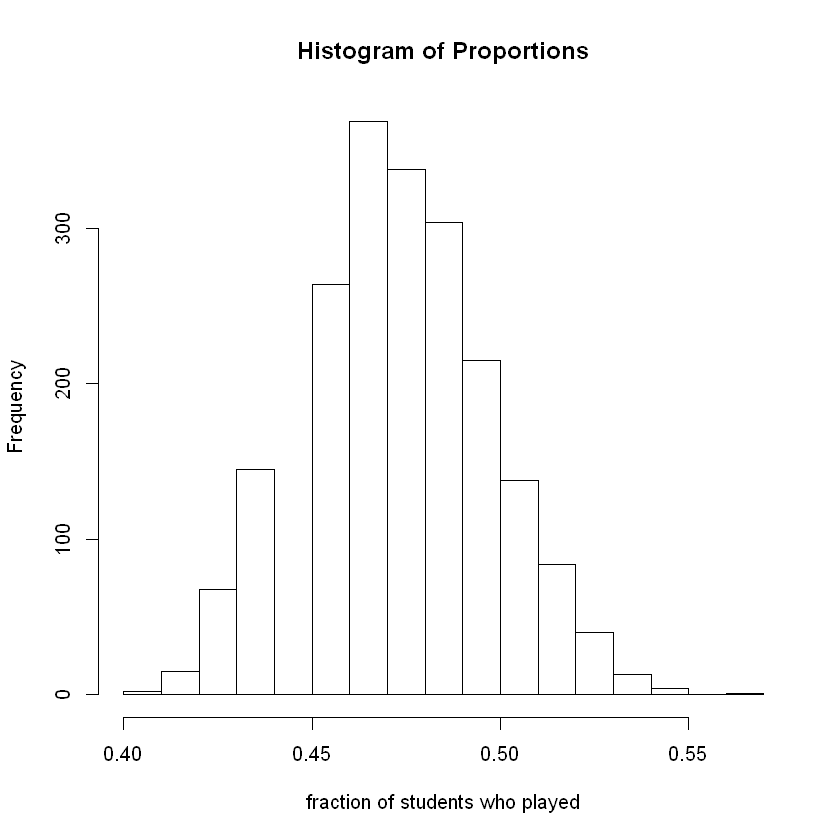

In [13]:
# show the histogram
hist(resample, main='Histogram of Proportions', xlab='fraction of students who played', breaks=15)

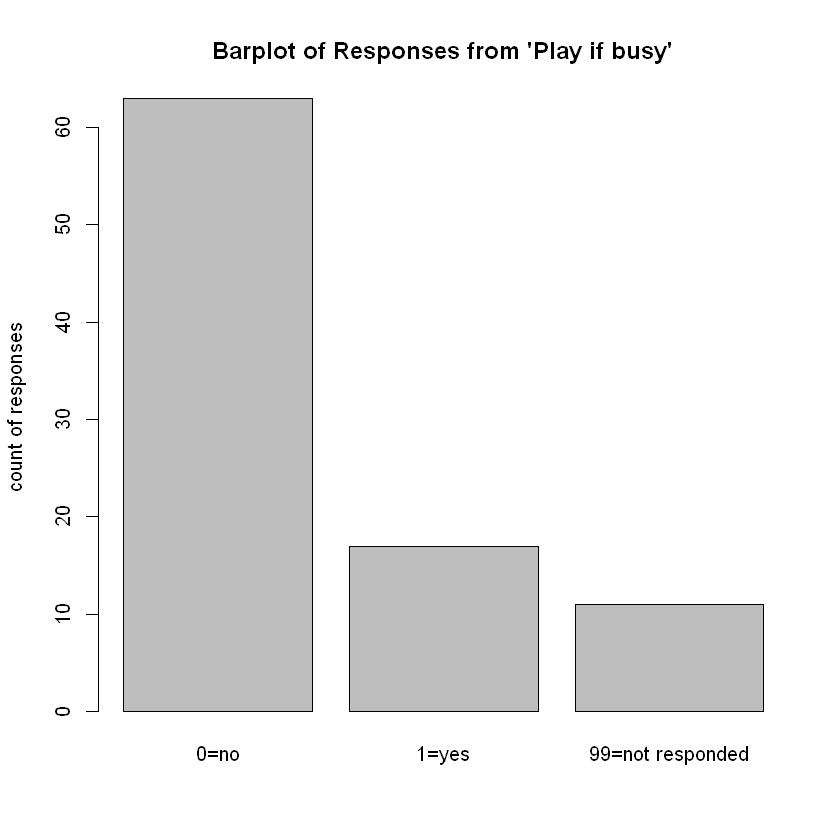

In [14]:
# visually show if students will still play video game if they are busy
barplot(table(survey$busy),main="Barplot of Responses from 'Play if busy'",
       names.arg=(c('0=no','1=yes','99=not responded')),
       ylab='count of responses')

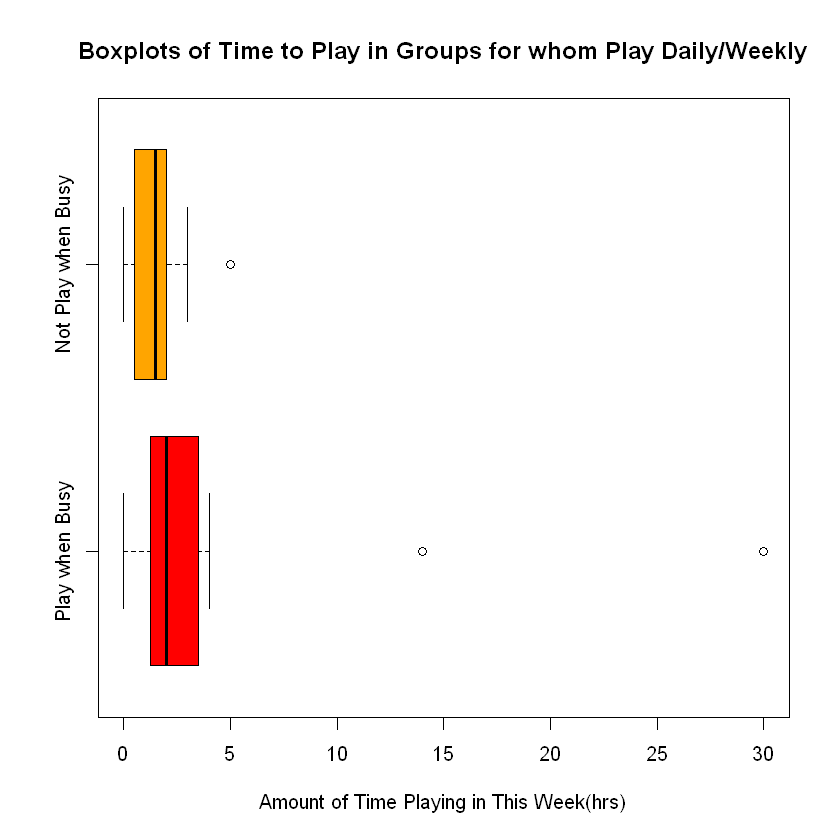

In [15]:
# divide the dataset into two groups according to their responses in 'busy'
busy_play <- subset(survey, busy==1)
busy_noplay <- subset(survey, busy==0)

# visually plot their amounts of play in this week for these two groups
# these groups only contain people who also report their frequency of playing is daily and weekly
boxplot(subset(busy_play,freq==1 | freq==2)$time, subset(busy_noplay,freq==1 | freq==2)$time, 
       horizontal=TRUE, col=c('red','orange'),
       names=c('Play when Busy','Not Play when Busy'),
       main='Boxplots of Time to Play in Groups for whom Play Daily/Weekly',xlab='Amount of Time Playing in This Week(hrs)')

# Scenario 3

Consider making an interval estimate for the average amount of time spent playing video games in the week prior to the survey. Keep in mind the overall shape of the sample distribution. A simulation study may help determine the appropriateness of an interval estimate.

In [5]:
Time <- survey$time
freq <- mean(Time)
freq

[1] 1.242857

2.5%    97.5% 
1.242857 1.242857

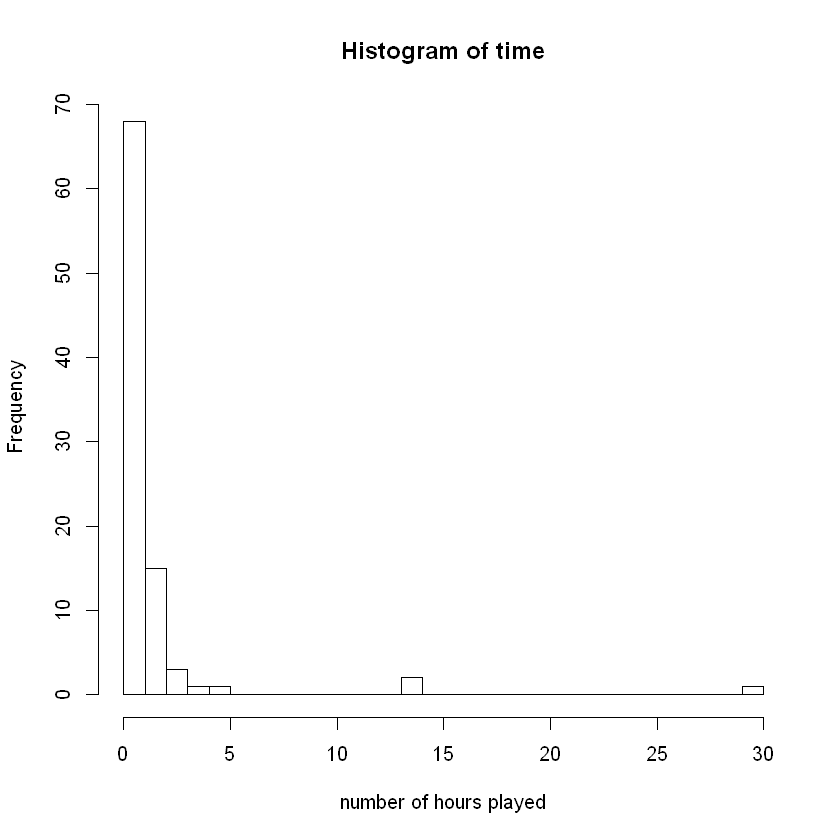

In [6]:
# show the histogram
hist(Time, main='Histogram of time',xlab='number of hours played', breaks = 30)
quantile(freq, c(0.025, 0.975))

In [7]:
boot_population <- rep(survey$time, length.out = 314)

2.5%     97.5% 
0.6168407 1.7770055

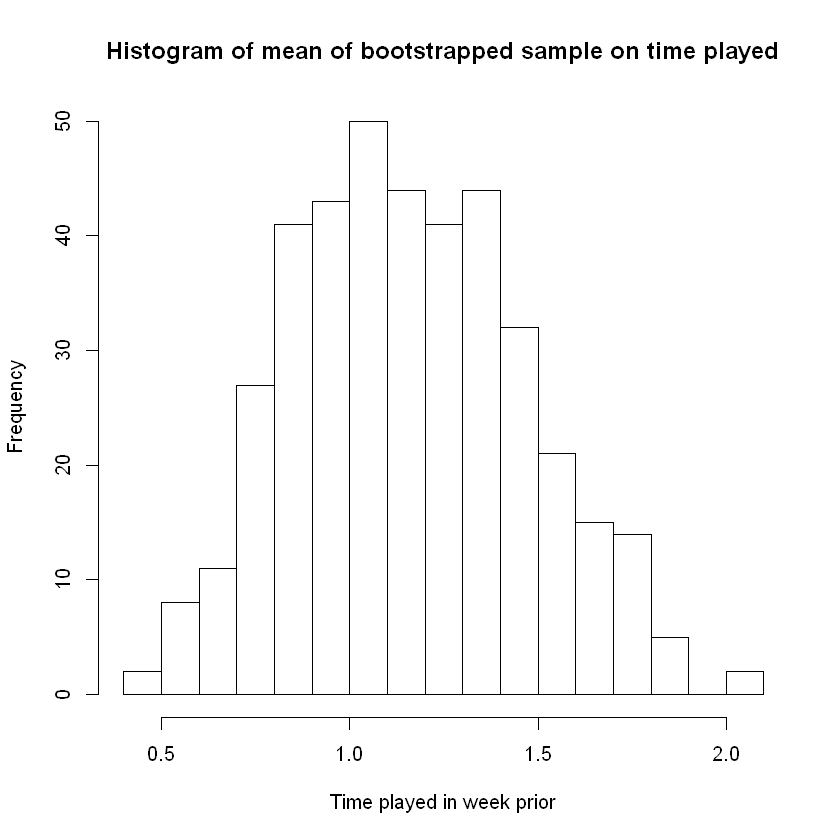

In [8]:
boot_means = 1:400
for(i in 1:400){
  boot_sample = sample(boot_population, size = 91, replace = F)
  boot_means[i] = mean(boot_sample)
}

hist(boot_means, breaks = 20,  main = "Histogram of mean of bootstrapped sample on time played", xlab = "Time played in week prior")
quantile(boot_means, c(0.025, 0.975))

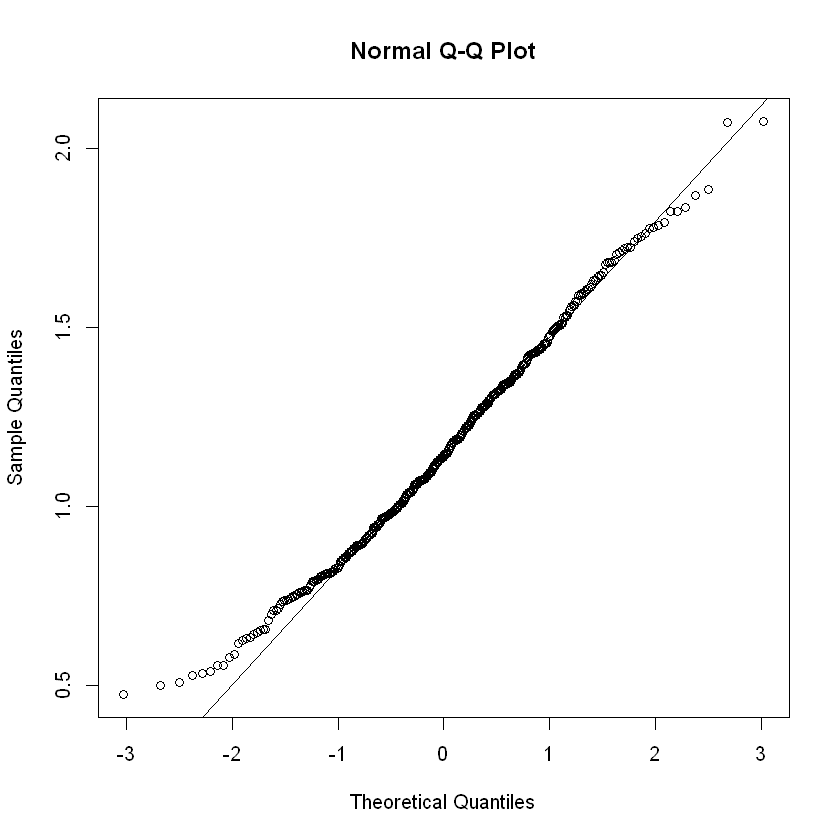

In [9]:

qqnorm(boot_means)
qqline(boot_means)

In [ ]:

skewness(boot_means)
kurtosis(boot_means)
n_sample <- rnorm(n=500)
skewness(n_sample)
kurtosis(n_sample)


In [12]:
mean(boot_means)

[1] 1.160648

# Scenario 4

Next consider the ”attitude” questions. In general, do you think the students enjoy playing video games? If you had to make a short list of the most important reasons why students like/dislike video games, what would you put on the list? Don’t forget that those students who say that they have never played video games or do not at all like video games are asked to skip over some of these questions. So, there may be many nonrespondents to the questions as to whether they think video games are educational, where they play video games, etc.            

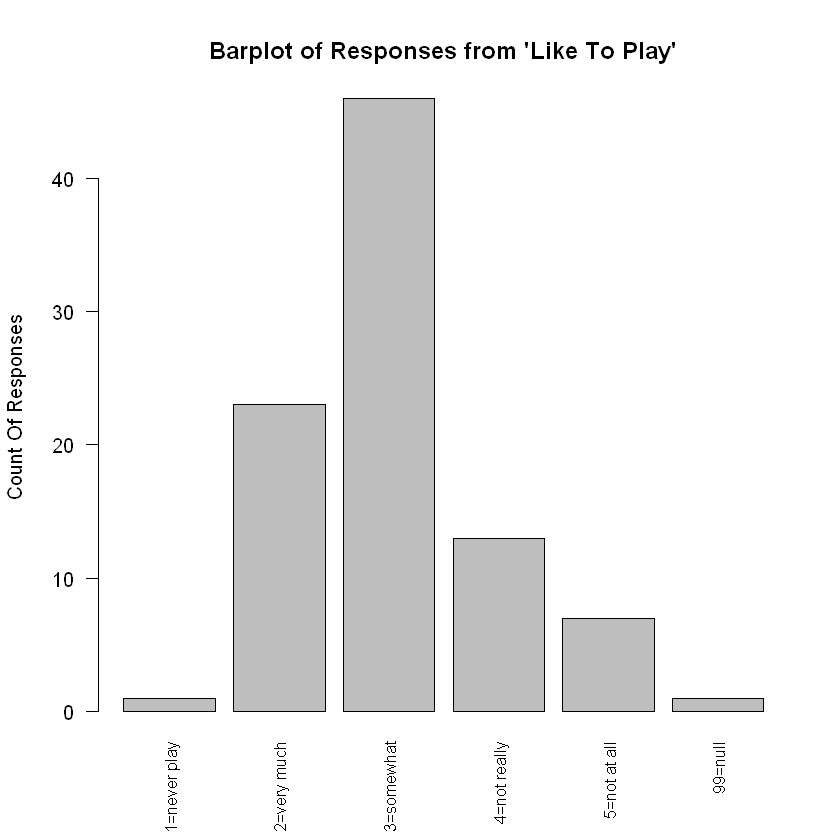

In [16]:
# visually show the distribution of 'like to play'
barplot(table(survey$like), main="Barplot of Responses from 'Like To Play'",
       ylab='Count Of Responses',
       names.arg=c('1=never play','2=very much','3=somewhat','4=not really','5=not at all','99=null'),
       las=2,cex.names=0.8)

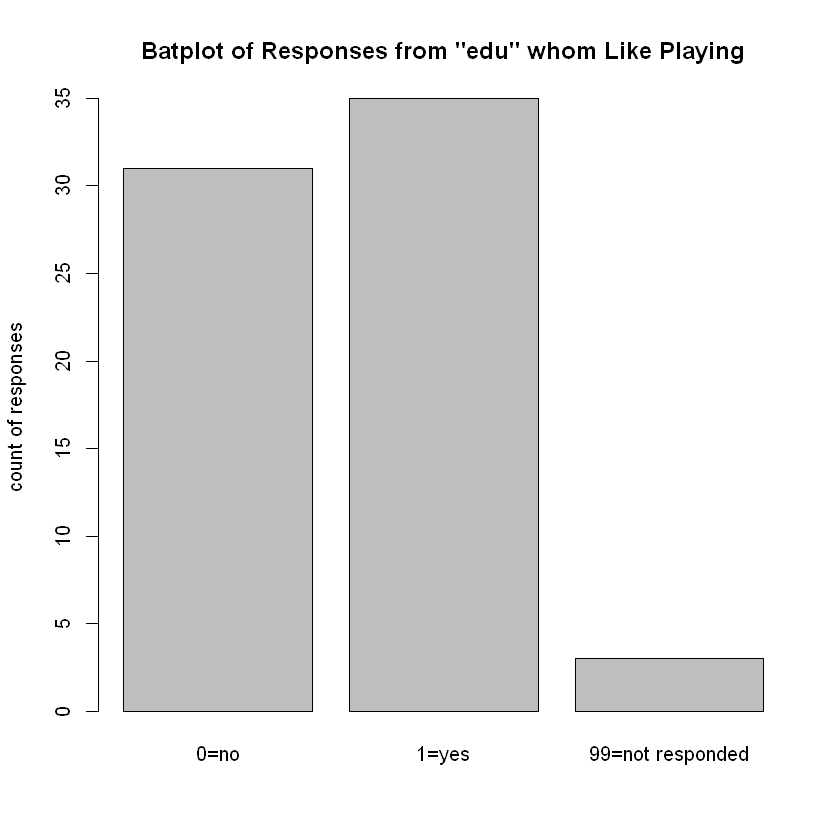

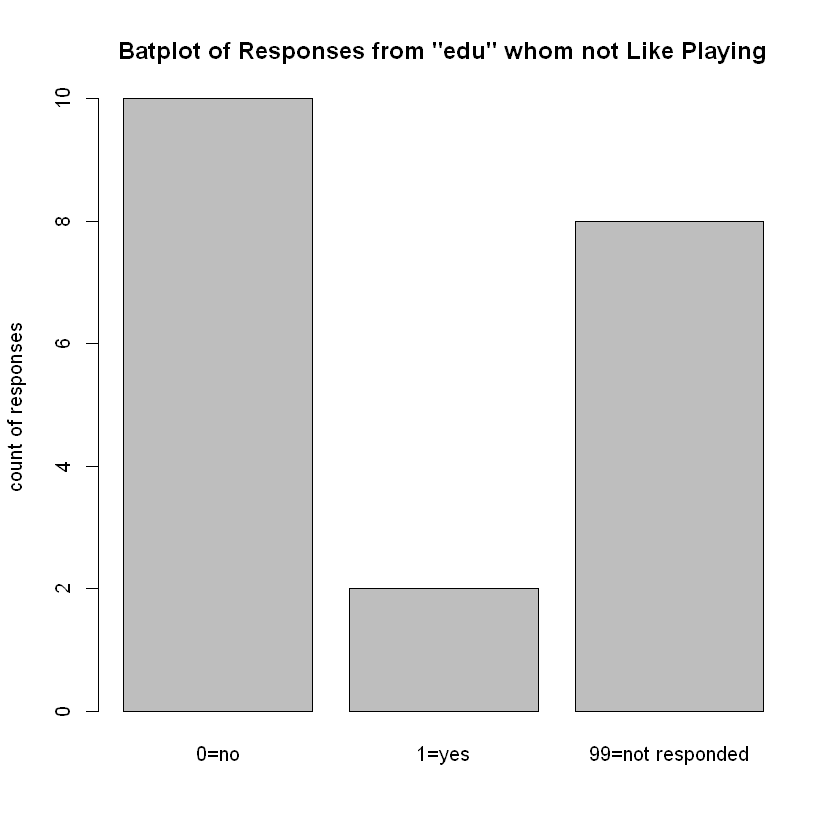

In [17]:
# visually show the distribution of variable 'edu' in the sample
like <- subset(survey, like==2 | like==3)
barplot(table(like$edu), main='Batplot of Responses from "edu" whom Like Playing',
       names.arg=(c('0=no','1=yes','99=not responded')), ylab='count of responses')

# visually shiow the distribution of 'edu' in group that who have played game and not like video games
not_like <- subset(survey, like==4 | like==5)
barplot(table(not_like$edu), main='Batplot of Responses from "edu" whom not Like Playing',
       names.arg=(c('0=no','1=yes','99=not responded')), ylab='count of responses')

In [18]:
# check how many null values in each column
colSums(is.na(followup))

# most of columns contains 4 null values, which indicates that there are four people did not respond to 3 attitude questions at all
# drop these four people from the dataset
followup_nonull <- drop_na(followup)

# check the remaining rows in table
nrow(followup_nonull)

action       adv       sim     sport  strategy     relax     coord challenge 
        4         4         4         4         4         4         4         4 
   master     bored     other   graphic      time     frust    lonely     rules 
        4         4         0         4         4         4         4         4 
     cost    boring   friends     point    other2 
        4         4         4         4         0

[1] 87

In [19]:
# show the column names in the followup survey
colnames(followup)

# extract the variables for different table
# table 1 summarizes the types of games played
table1 <- select(followup_nonull, c('action','adv','sim','sport','strategy'))

# table 2 summarizes reasons for playing the game
table2 <- select(followup_nonull, c('relax', 'coord', 'challenge','master','bored','graphic'))

# table 3 summarizes what students didn't like about the games
table3 <- select(followup_nonull, c('time','frust','lonely','rules','cost','boring','friends','point'))

[1] "action"    "adv"       "sim"       "sport"     "strategy"  "relax"    
 [7] "coord"     "challenge" "master"    "bored"     "other"     "graphic"  
[13] "time"      "frust"     "lonely"    "rules"     "cost"      "boring"   
[19] "friends"   "point"     "other2"

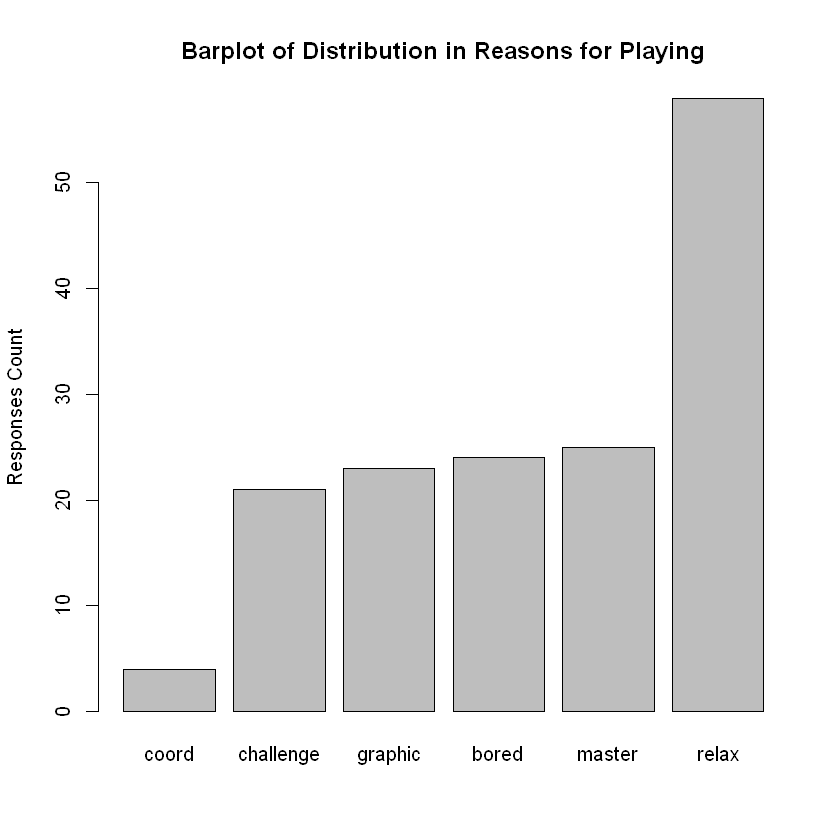

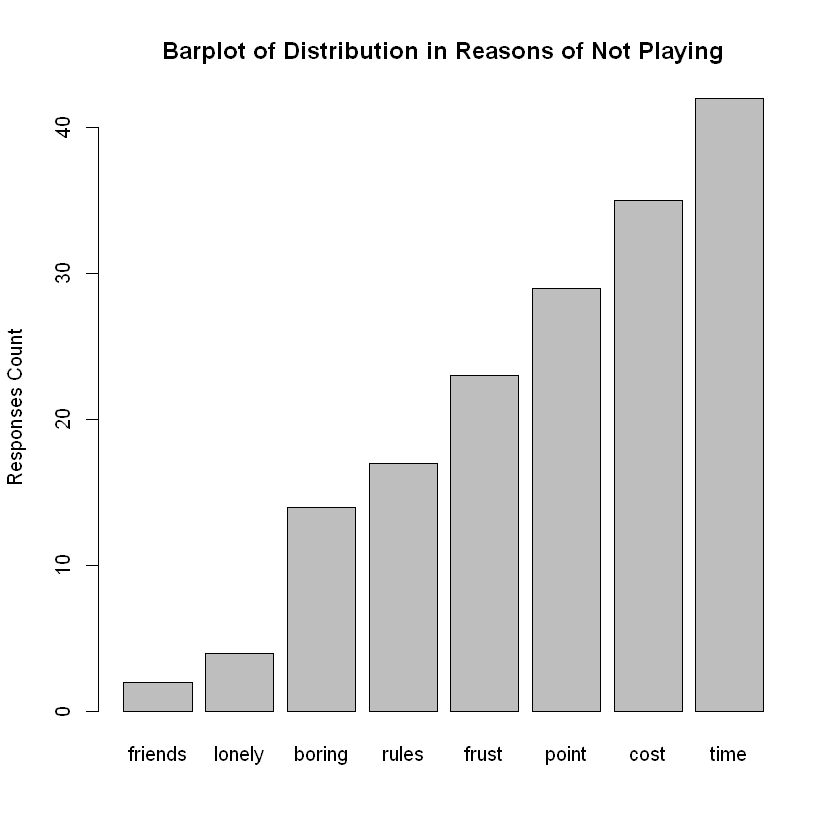

In [20]:
barplot(sort(colSums(table2)),main='Barplot of Distribution in Reasons for Playing',ylab='Responses Count')
barplot(sort(colSums(table3)),main='Barplot of Distribution in Reasons of Not Playing',ylab='Responses Count')

# Scenario 5

Look for the differences between those who like to play video games and those who don’t. To do this, use the questions in the last part of the survey, and make comparisons between male and female students, those who work for pay and those who don’t, those who own a computer and those who don’t. Graphical display and cross-tabulations are particularly helpful in making these kinds of comparisons. Also, you may want to collapse the range of responses to a question down to two or three possibilities before making these comparisons.

# Scenario 6 (optional)

Just for fun, further investigate the grade that students expect in the course. How will does it match the target distribution used in grade assignment of 20% A’s, 30%B’s,40% c’s and 10%D’s or lower? If the nonrespondents were failing students who no longer bothered to come to the discussion section, would this change the picture ?

In [23]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [21]:
# construct a target distribution by using same size of sample
a <- replicate(0.2*91, 4)
b <- replicate(0.3*91, 3)
c <- c(replicate(0.4*91, 2),1)
d <- replicate(0.1*91, 1)
target <- c(a,b,c,d)

expected <- survey$grade

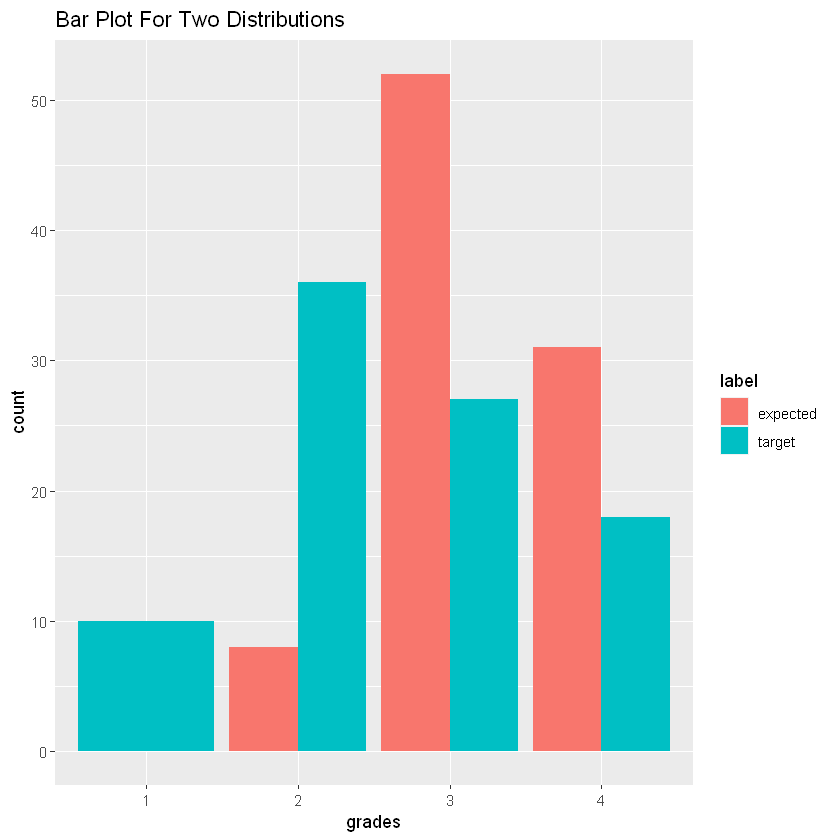

In [24]:
# visually show the distributions for two datasets
label <- c(replicate(91, 'target'), replicate(91,'expected'))
dist <- data.frame(cbind(c(target,expected), label))
ggplot(dist, aes(x=V1,fill=label))+geom_bar(position=position_dodge())+
ggtitle('Bar Plot For Two Distributions')+xlab('grades')

In [31]:
# perform ks test to check if the two dataset comes from same distribution
# null hypothesis is that these two datasets coming from same distribution
ks.test(expected, target)

Warning message in ks.test(expected, target):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  expected and target
D = 0.41758, p-value = 2.568e-07
alternative hypothesis: two-sided
